# Data Project - Stock Market Analysis 

In this notebook we will be looking at data from the stock market, particularly Apple stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the stock?
    4.) How much value do we put at risk by investing in a particular stock?
    5.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

#Show apple data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001


Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
# Summary Stats
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2263.000000,2263.000000,2263.000000,2263.000000,2.263000e+03,2263.000000
mean,39.117738,38.313156,38.713090,38.731316,2.284657e+08,37.043920
std,24.631299,23.924553,24.281844,24.297203,1.803033e+08,24.917072
min,14.271428,13.753572,13.856071,13.947500,2.420510e+07,12.209413
25%,22.889822,22.443750,22.689643,22.656964,1.097090e+08,20.079311
50%,29.980000,29.555000,29.745001,29.812500,1.661160e+08,27.713835
75%,46.841249,46.160000,46.483751,46.488750,2.823562e+08,45.217300
max,138.789993,134.339996,138.050003,136.690002,1.506120e+09,136.690002


In [4]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2012-01-03 to 2020-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2263 non-null   float64
 1   Low        2263 non-null   float64
 2   Open       2263 non-null   float64
 3   Close      2263 non-null   float64
 4   Volume     2263 non-null   float64
 5   Adj Close  2263 non-null   float64
dtypes: float64(6)
memory usage: 123.8 KB


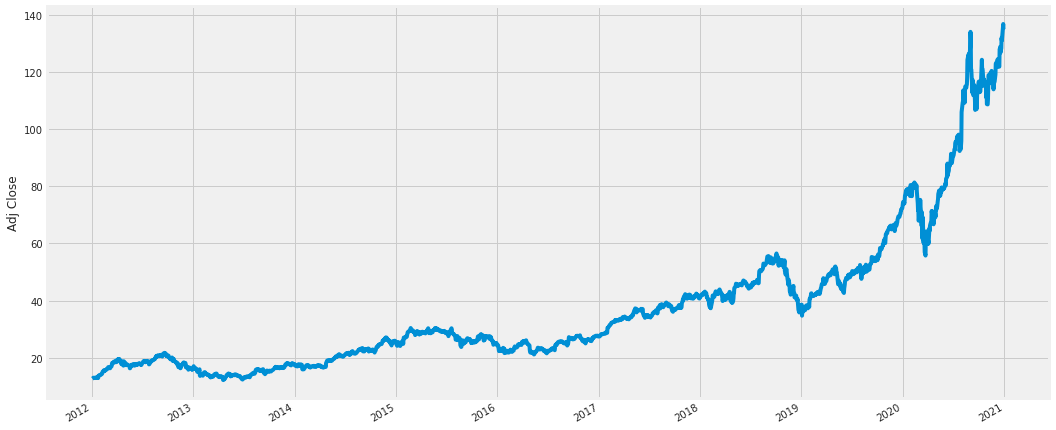

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(16,8))

df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.show()

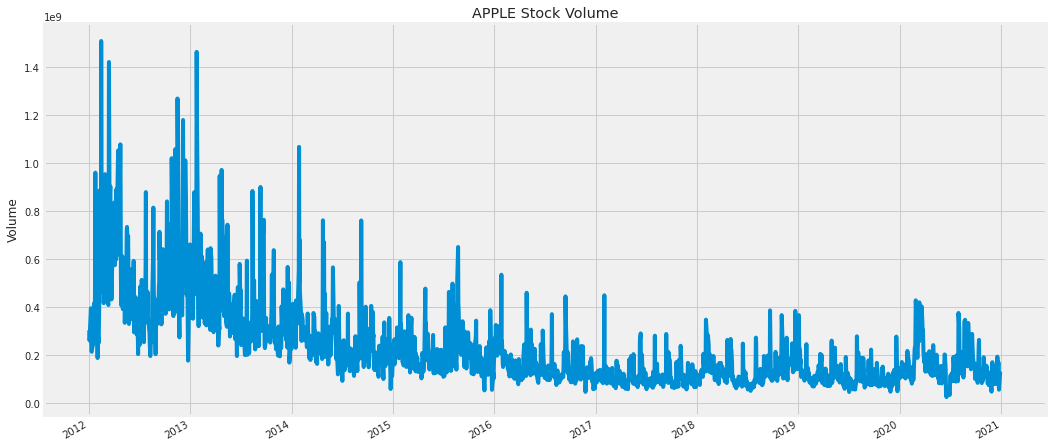

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(16,8))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("APPLE Stock Volume")
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

In [8]:
print(df.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

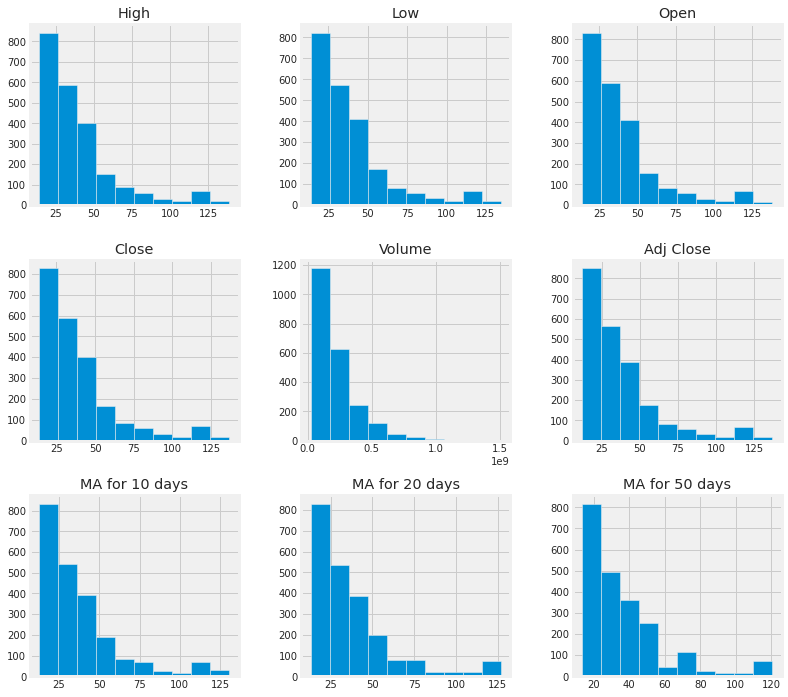

In [9]:
df.hist(figsize=(12, 12));

<Figure size 1152x864 with 0 Axes>

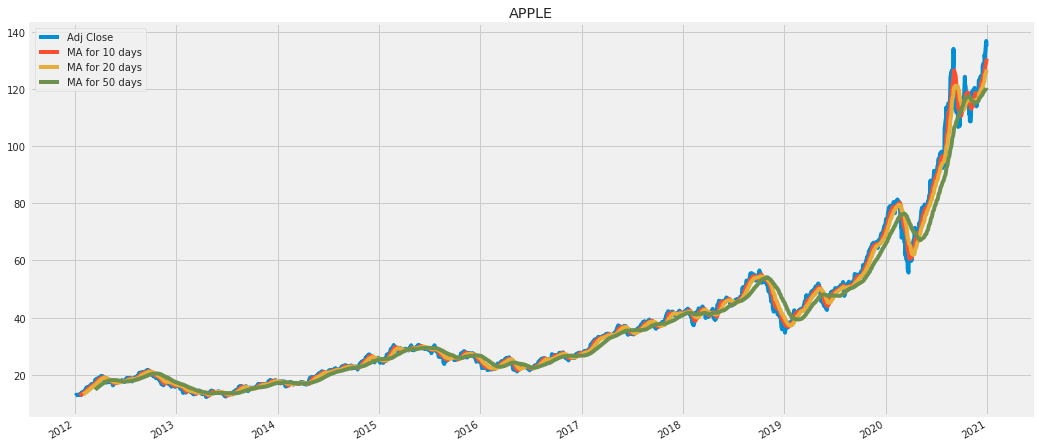

In [10]:
plt.figure(figsize=(16,12))
plt.rcParams["figure.figsize"] = (16,8)

df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("APPLE")
plt.show()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

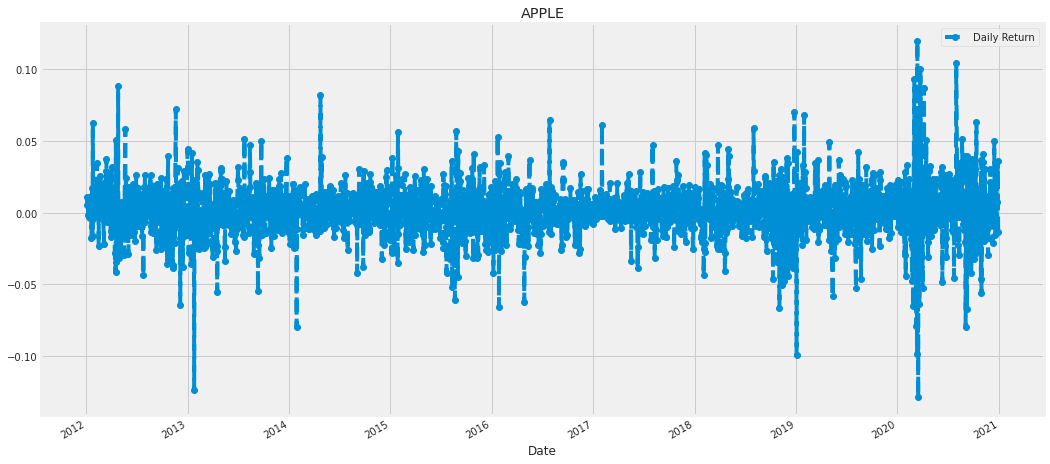

In [11]:
df['Daily Return'] = df['Adj Close'].pct_change()

# plt.rcParams["figure.figsize"] = (16,8)

df['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.ylabel(None)
plt.xlabel('Date')
plt.title("APPLE")
plt.show()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/home/aswadi/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


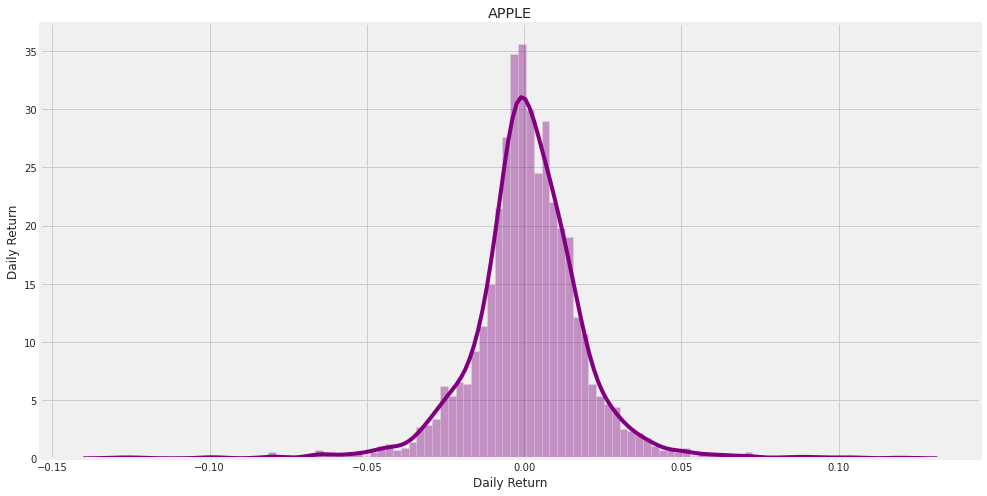

In [12]:
plt.figure(figsize=(15, 8))

sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('APPLE')
plt.show()

In [13]:
df

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562,NaN,NaN,NaN,NaN
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655,NaN,NaN,NaN,0.005374
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071,NaN,NaN,NaN,0.011102
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705,NaN,NaN,NaN,0.010454
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064,NaN,NaN,NaN,-0.001586
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005,126.037000,123.316500,119.252436,0.028465
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007,126.955000,124.106000,119.453808,-0.006976
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001,127.828001,124.903000,119.673582,0.007712


# 4. How much value do we put at risk by investing in a particular stock?

In [14]:
tech_rets = df['Adj Close'].pct_change()
tech_rets.head()

Date
2012-01-03         NaN
2012-01-04    0.005374
2012-01-05    0.011102
2012-01-06    0.010454
2012-01-09   -0.001586
Name: Adj Close, dtype: float64

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

# 5. Predicting the closing price stock price of APPLE inc:

In [3]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995


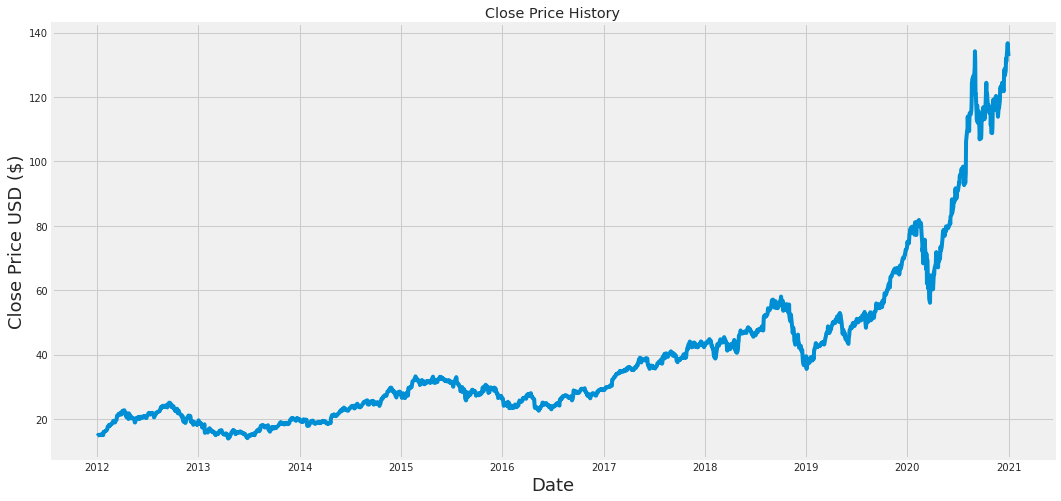

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1812

In [6]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.00666611],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00602306, 0.00666611, 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851958, 0.00994242,
       0.01122559, 0.01082987, 0.00866215, 0.01073094, 0.00869416,
       0.0163321 , 0.01574143, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117443, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420113,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.04407018, 0.04499548, 0.04698279, 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.06268348, 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.00666611, 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851958, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 95s 51ms/step - loss: 4.2168e-04


In [9]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.5266519476561493

<ipython-input-32-3834f8ca859d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


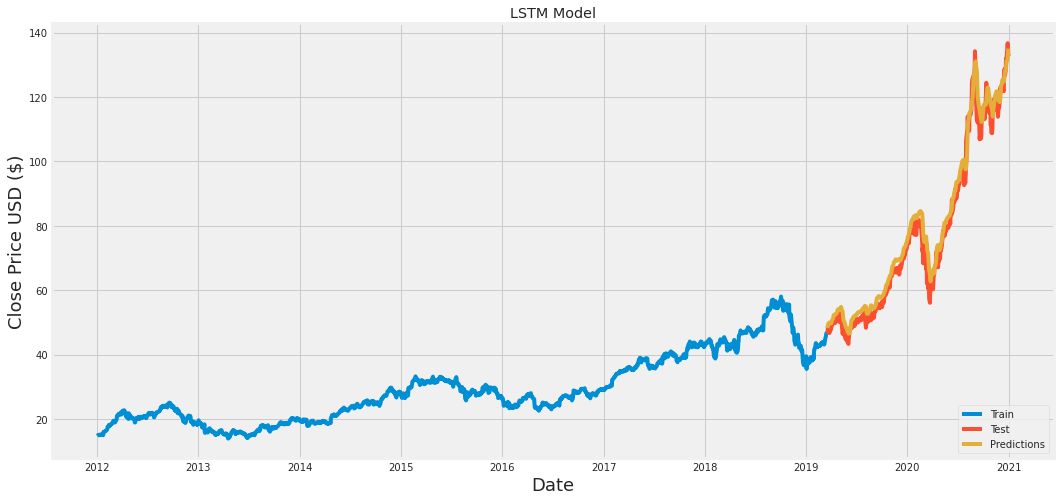

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid.T

Date,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-04-01,...,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2020-12-31
Close,46.632500,47.040001,48.772499,47.762501,47.185001,46.697498,47.117500,47.180000,47.487499,47.810001,...,128.699997,126.660004,128.229996,131.880005,130.960007,131.970001,136.690002,134.869995,133.720001,132.690002
Predictions,48.250755,48.635178,48.950375,49.498608,49.867073,49.980034,49.862095,49.736092,49.641281,49.638561,...,126.661331,127.841873,128.451141,129.005783,130.084427,130.971725,131.806076,133.319290,134.443130,134.990967
